## Get Data from finlab official API

In [1]:
from finlab import data
import finlab

finlab.login("tiyybDDkjfj91vIexZCvLwL84ClFRIKE2yQwZBKP/dpT8FMnMdr9dxTKxwt29KjD#free")

輸入成功!


In [7]:
close = data.get('price:收盤價')
open_ = data.get("price:開盤價")
high = data.get("price:最高價")
low = data.get("price:最低價")
volume = data.get("price:成交股數")

## Get Data from finlab AI course 

In [2]:
from finlab.data import Data

data = Data()


close = data.get("收盤價")
open_ = data.get("開盤價")
high = data.get("最高價")
low = data.get("最低價")
vol = data.get("成交股數")

ModuleNotFoundError: No module named 'finlab'

In [12]:
print(f"*******************close.head()*******************")
print(close.head())
print(f"*******************close.tail()*******************")
print(close.tail())

*******************close.head()*******************
            0015   0050   0051   0052  0053  0054  0055  0056  0057  0058  \
date                                                                        
2007-04-23  9.54  57.85  32.83  38.40   NaN   NaN   NaN   NaN   NaN   NaN   
2007-04-24  9.54  58.10  32.99  38.65   NaN   NaN   NaN   NaN   NaN   NaN   
2007-04-25  9.52  57.60  32.80  38.59   NaN   NaN   NaN   NaN   NaN   NaN   
2007-04-26  9.59  57.70  32.80  38.60   NaN   NaN   NaN   NaN   NaN   NaN   
2007-04-27  9.55  57.50  32.72  38.40   NaN   NaN   NaN   NaN   NaN   NaN   

            ...  9944   9945   9946  9949   9950  9951  9955  9958  9960  9962  
date        ...                                                                 
2007-04-23  ...  31.0  30.35   9.78  73.6  13.25  51.3  72.4   NaN  46.0  49.6  
2007-04-24  ...  32.0  30.50   9.91  75.0  13.25  50.5  71.6   NaN  45.9  50.4  
2007-04-25  ...  32.3  29.50  10.10  74.6  13.30  49.9  71.6   NaN  49.1  49.1  
2007

### talib直接使用

<AxesSubplot:xlabel='date'>

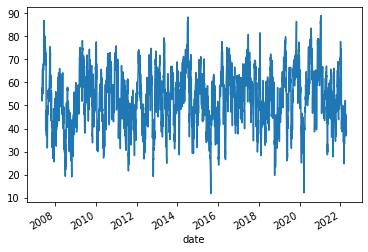

In [11]:
import talib
import matplotlib.pyplot as plt
%matplotlib inline

talib.RSI(close['0050']).plot()

### talib使用abstract（用dataframe）

<AxesSubplot:xlabel='date'>

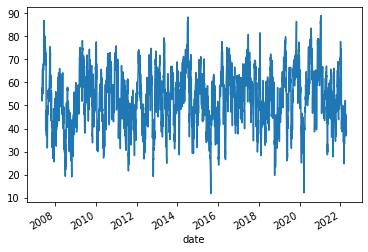

In [14]:
import talib.abstract as abstract
import pandas as pd

sid = '0050'

df = pd.DataFrame({
    'open': open_[sid],
    'high': high[sid],
    'low': low[sid],
    'close': close[sid],
    'volume': volume[sid]
}).astype(float)

abstract.RSI(df).plot()

## 使用 finlab API取得技術指標資訊

In [18]:
#使用 finlab API
from finlab.data import Data

data = Data()
k, d = data.talib("STOCH")

print("****************** k.head() *******************")
print(k.head())
print("****************** k.tail() *******************")
print(k.tail())


ImportError: cannot import name 'Data' from 'finlab.data' (C:\Users\Leamon_Lee\AppData\Local\Programs\Python\Python38\lib\site-packages\finlab\data.py)

### 計算所有指標

In [27]:
indicators = {}
for fname in dir(abstract):
    if fname[:2] == '__':
        continue
        
    if fname[:3] == 'CDL':
        continue
        
    if fname.upper() != fname:
        continue
    
    print(fname)
    try:
        f = getattr(abstract, fname)
        indicators[fname] = f(df)
        # rsi = abstract.RSI(df)    # 上面兩行等於這一行，但上面兩行更有彈性 
    except:
        print('fail')
        pass

# print("indicators: ", type(indicators['ACOS']))
print("********************** STOCH_df ***************************")
STOCH_df = pd.DataFrame(indicators['STOCH'], columns=["STOCH"])
print(len(STOCH_df))
print(STOCH_df.head())
# indicators_df = pd.DataFrame(indicators)
# print("indicators_df.head(): ", indicators_df.head())

ACOS
AD
ADD
ADOSC
ADX
ADXR
APO
AROON
AROONOSC
ASIN
ATAN
ATR
AVGPRICE
BBANDS
BETA
BOP
CCI
CEIL
CMO
CORREL
COS
COSH
DEMA
DIV
DX
EMA
EXP
FLOOR
HT_DCPERIOD
HT_DCPHASE
HT_PHASOR
HT_SINE
HT_TRENDLINE
HT_TRENDMODE
KAMA
LINEARREG
LINEARREG_ANGLE
LINEARREG_INTERCEPT
LINEARREG_SLOPE
LN
LOG10
MA
MACD
MACDEXT
MACDFIX
MAMA
MAVP
fail
MAX
MAXINDEX
MEDPRICE
MFI
MIDPOINT
MIDPRICE
MIN
MININDEX
MINMAX
MINMAXINDEX
MINUS_DI
MINUS_DM
MOM
MULT
NATR
OBV
PLUS_DI
PLUS_DM
PPO
ROC
ROCP
ROCR
ROCR100
RSI
SAR
SAREXT
SIN
SINH
SMA
SQRT
STDDEV
STOCH
STOCHF
STOCHRSI
SUB
SUM
T3
TAN
TANH
TA_FUNC_FLAGS
fail
TA_INPUT_FLAGS
fail
TA_OUTPUT_FLAGS
fail
TEMA
TRANGE
TRIMA
TRIX
TSF
TYPPRICE
ULTOSC
VAR
WCLPRICE
WILLR
WMA
********************** STOCH_df ***************************
3697
            STOCH
date             
2007-04-23    NaN
2007-04-24    NaN
2007-04-25    NaN
2007-04-26    NaN
2007-04-27    NaN


### 繪製所有指標

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
for name, df_ in indicators.items():
    print(name)
    df_.hist()
    plt.show()
    df_.plot()
    plt.show()

### 察看指標的屬性

In [ ]:
print('------- parameters -------')
print(abstract.STOCH.parameters)

print('------- output_names ------')
print(abstract.STOCH.output_names)

### keyword arguments 教學

In [ ]:
# functional argument

def func(a, b):
    return a + b

params = {}
params['a'] = 1
params['b'] = 2

func(**params) # func(a=1, b=2)

### 參數調整

In [ ]:
params = dict(abstract.STOCH.parameters)

print('original parameters')
print(params)

params2 = {}
for name, value in params.items():
    params2[name] = value * 2

print('modified parameters')
print(params2)

### 製作features

In [8]:
from finlab import ml

features = ml.talib_features(df, ['STOCH', 'RSI', 'ADOSC'], [1,3,5,10])
features

,"STOCH_slowk_{'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 5, 'slowk_period': 3, 'slowk_matype': 0, 'slowd_period': 3, 'slowd_matype': 0}","STOCH_slowk_{'fastk_period': 15, 'slowk_period': 9, 'slowk_matype': 0, 'slowd_period': 9, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 15, 'slowk_period': 9, 'slowk_matype': 0, 'slowd_period': 9, 'slowd_matype': 0}","STOCH_slowk_{'fastk_period': 25, 'slowk_period': 15, 'slowk_matype': 0, 'slowd_period': 15, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 25, 'slowk_period': 15, 'slowk_matype': 0, 'slowd_period': 15, 'slowd_matype': 0}","STOCH_slowk_{'fastk_period': 50, 'slowk_period': 30, 'slowk_matype': 0, 'slowd_period': 30, 'slowd_matype': 0}","STOCH_slowd_{'fastk_period': 50, 'slowk_period': 30, 'slowk_matype': 0, 'slowd_period': 30, 'slowd_matype': 0}",RSI_{'timeperiod': 14},RSI_{'timeperiod': 42},RSI_{'timeperiod': 70},RSI_{'timeperiod': 140},"ADOSC_{'fastperiod': 3, 'slowperiod': 10}","ADOSC_{'fastperiod': 9, 'slowperiod': 30}","ADOSC_{'fastperiod': 15, 'slowperiod': 50}","ADOSC_{'fastperiod': 30, 'slowperiod': 100}"
date,,,,,,,,,,,,,,,,
2007-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,84.313082,81.613427,63.230743,64.047415,69.983754,66.164544,81.351326,67.354307,60.753423,55.523466,54.361043,54.500555,-5.163875e+05,3.122273e+06,9.650473e+06,2.613169e+07
2021-12-27,87.183638,86.176159,69.361771,64.217744,71.866971,66.257143,81.989096,68.541676,64.926276,56.906576,55.147885,54.869346,-6.848254e+04,2.991303e+06,9.353060e+06,2.577709e+07
2021-12-28,93.505477,88.334066,75.372700,65.366729,73.443547,66.548006,82.597562,69.683144,68.675993,58.295502,55.953298,55.251268,7.403578e+06,5.955668e+06,1.102063e+07,2.644244e+07
